In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [23]:
pip install pywaffle

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pywaffle import Waffle

***
# Part 1

## Question: Does chocolate reign supreme?

### Task

Create a stacked bar chart using the data frame that excludes the Tootsie Roll Pop that summarizes what proportion of each winning class corresponds to each type of candy.  This means you will group the data by the categorical win frequency (`win_cat`) and within these groups show the relative percentages of each type of candy (`is_chocolate`).

In [3]:
# Uploading the csv:
choc_df1 = pd.read_csv("Candy_edited.csv")
choc_df1

,competitorname,chocolate,fruity,is_chocolate,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,is_pluribus,sugarpercent,pricepercent,winpercent,win_cat
0,100 Grand,1,0,chocolate,1,0,0,1,0,1,0,bar,73.199999,86.000001,66.971725,often
1,3 Musketeers,1,0,chocolate,0,0,1,0,0,1,0,bar,60.399997,51.099998,67.602936,often
2,One dime,0,0,neither,0,0,0,0,0,0,0,neither,1.100000,11.600000,32.261086,sometimes
3,One quarter,0,0,neither,0,0,0,0,0,0,0,neither,1.100000,51.099998,46.116505,sometimes
4,Air Heads,0,1,fruity,0,0,0,0,0,0,0,neither,90.600002,51.099998,52.341465,often
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,fruity,0,0,0,0,0,0,0,neither,22.000000,11.600000,45.466282,sometimes
81,Warheads,0,1,fruity,0,0,0,0,1,0,0,neither,9.300000,11.600000,39.011898,sometimes
82,Welch's Fruit Snacks,0,1,fruity,0,0,0,0,0,0,1,pluribus,31.299999,31.299999,44.375519,sometimes
83,Werther's Original Caramel,0,0,neither,1,0,0,0,1,0,0,neither,18.600000,26.699999,41.904308,sometimes


In [4]:
# Create a new dataframe and remove the "both" observation
choc_df2 = choc_df1[choc_df1['competitorname'] != 'Tootsie Pop']
choc_df2

,competitorname,chocolate,fruity,is_chocolate,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,is_pluribus,sugarpercent,pricepercent,winpercent,win_cat
0,100 Grand,1,0,chocolate,1,0,0,1,0,1,0,bar,73.199999,86.000001,66.971725,often
1,3 Musketeers,1,0,chocolate,0,0,1,0,0,1,0,bar,60.399997,51.099998,67.602936,often
2,One dime,0,0,neither,0,0,0,0,0,0,0,neither,1.100000,11.600000,32.261086,sometimes
3,One quarter,0,0,neither,0,0,0,0,0,0,0,neither,1.100000,51.099998,46.116505,sometimes
4,Air Heads,0,1,fruity,0,0,0,0,0,0,0,neither,90.600002,51.099998,52.341465,often
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,fruity,0,0,0,0,0,0,0,neither,22.000000,11.600000,45.466282,sometimes
81,Warheads,0,1,fruity,0,0,0,0,1,0,0,neither,9.300000,11.600000,39.011898,sometimes
82,Welch's Fruit Snacks,0,1,fruity,0,0,0,0,0,0,1,pluribus,31.299999,31.299999,44.375519,sometimes
83,Werther's Original Caramel,0,0,neither,1,0,0,0,1,0,0,neither,18.600000,26.699999,41.904308,sometimes


In [6]:
# Making a dataframe of the relevant columns:
part1_df = choc_df2[['win_cat', 'is_chocolate']]
part1_df

,win_cat,is_chocolate
0,often,chocolate
1,often,chocolate
2,sometimes,neither
3,sometimes,neither
4,often,fruity
...,...,...
80,sometimes,fruity
81,sometimes,fruity
82,sometimes,fruity
83,sometimes,neither


In [7]:
# Renaming the values:
part1_df['win_cat'].replace(['sometimes','often','a_lot','rarely'],
                            ['Sometimes', 'Often', 'A lot', 'Rarely'], inplace = True)
part1_df['is_chocolate'].replace(['chocolate', 'neither', 'fruity'],
                                 ['Chocolate', 'Neither', 'Fruity'], inplace = True)

In [8]:
part1_df

,win_cat,is_chocolate
0,Often,Chocolate
1,Often,Chocolate
2,Sometimes,Neither
3,Sometimes,Neither
4,Often,Fruity
...,...,...
80,Sometimes,Fruity
81,Sometimes,Fruity
82,Sometimes,Fruity
83,Sometimes,Neither


In [9]:
# Frequency table:
part1_rawtab = pd.crosstab(part1_df['win_cat'], part1_df['is_chocolate'])
part1_rawtab

is_chocolate,Chocolate,Fruity,Neither
win_cat,,,
A lot,5,0,0
Often,23,11,0
Rarely,0,2,1
Sometimes,8,24,10


In [11]:
# Relative Frequency table:
#want to normalize across rows because they represent candy percentages
part1_table = pd.crosstab(part1_df['win_cat'], part1_df['is_chocolate'],
                          normalize = 'index')
part1_table

is_chocolate,Chocolate,Fruity,Neither
win_cat,,,
A lot,1.000000,0.000000,0.000000
Often,0.676471,0.323529,0.000000
Rarely,0.000000,0.666667,0.333333
Sometimes,0.190476,0.571429,0.238095


<AxesSubplot:xlabel='win_cat'>

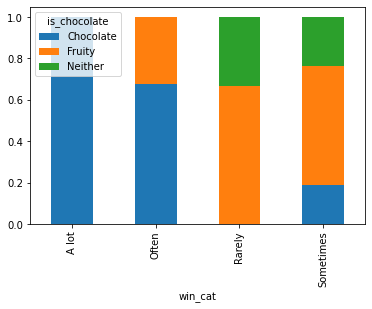

In [12]:
# Default graph: 
part1_table.plot.bar(stacked = True)

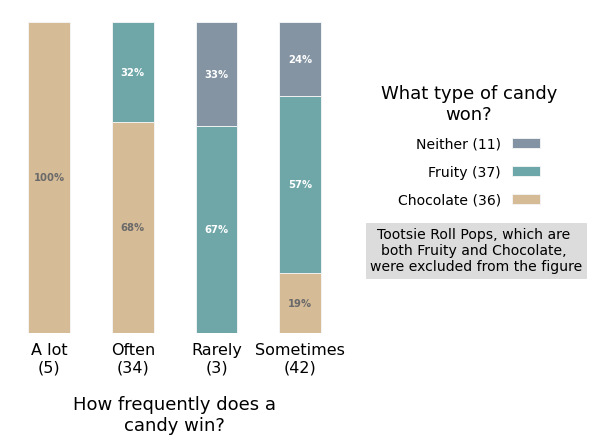

In [53]:
# Improving the plot:
ax = part1_table.plot.bar(stacked = True,
                          color = ['tan', 'cadetblue', 'lightslategray'],
                          figsize = [6,6], rot = 0, fontsize = 16, alpha = 0.9, ec = 'whitesmoke')
[ax.spines[i].set_visible(False) for i in ax.spines] #removing spines
ax.tick_params(length = 0) #removing tick marks
ax.get_yaxis().set_visible(False) #removing y-axis
plt.xlabel('How frequently does a\ncandy win?', fontsize = 18, labelpad = 20, ha = 'center')

##################################################################
##################################################################
#fixing the patches to include the percentages:
for h, i in enumerate(range(len(ax.patches))): #range(len(array)) indexes the array
    x, y, width = ax.patches[i].get_x(), ax.patches[i].get_y(), ax.patches[i].get_width() #NOTE: width all the same because same bar width
    
    #removing the patch heights that do not have values
    if h not in [2, 4, 8, 9]:
        height = ax.patches[i].get_height()
    
        center_x = x + width/2
        center_y = y + height/2
        label = f'{height*100:.0f}%'
        color = 'white'
        if h < 4:
            color = 'dimgrey'
        plt.text(center_x, center_y, label, ha = 'center', va = 'center', 
             color = color, weight = 'bold')
        
##################################################################
##################################################################
#including the totals for each bar from raw_tables:
freq_sums = part1_rawtab.sum(axis = 1) #sum across rows
x_labels = [freq_sums.index[i] + '\n(' + str(freq_sums[i]) + ')' for i in range(len(freq_sums))]
plt.xticks([0, 1, 2, 3], labels = x_labels)
plt.tick_params(pad = 10) #distance from x-axis

##################################################################
##################################################################
#fixing the legend:
handles, labels = ax.get_legend_handles_labels()

handle_order = [2, 1, 0] #indices of the barcontainer, colored bars
new_handles = [handles[i] for i in handle_order]

#including totals for each candy type in 'labels'
label_order = [2, 1, 0]
num_order = [2, 1, 0]
candy_sums = part1_rawtab.sum(axis = 0) #sum across columns
new_labels = [candy_sums.index[i] + ' (' + str(candy_sums[n]) + ')' \
              for i,n in zip(label_order, num_order)] #rearranging the order

leg = plt.legend(new_handles, new_labels, bbox_to_anchor = [1.68, 0.8],
                 title = "What type of candy\nwon?",
                 title_fontsize = 18, fontsize = 14,
                 markerfirst = False, frameon = False, labelspacing = 1)
leg.get_title().set_multialignment('center') #centers legend title

#adding text
plt.text(5.1, 0.2,
         'Tootsie Roll Pops, which are \nboth Fruity and Chocolate, \nwere excluded from the figure',
         ha = 'center', fontsize = 14, backgroundcolor = 'gainsboro')
             
plt.savefig('stacked_bar.png', bbox_inches = 'tight', facecolor = 'white')
plt.show()

***
# Part 2

## Question: How do chocolate and non-chocolate candies differ in winningness and price?

### Task

Create a set of histograms as subplots of one larger plot that show the distributions of `winpercent` and `pricepercent` for chocolate and non-chocolate candy.  This means you should have 4 histograms – do not create overlapping histograms, create 4 separate subplots. These should be organized in a 2x2 grid, this means 2 rows of 2 plots each.

In [62]:
# Creating four dataframes of win percent to price percent in chocolate and non-chocolate categories:
#NOTE: non-chocolate includes all categories except chocolate

#win percent chocolate
wpc_df = choc_df1['winpercent'].loc[choc_df1['is_chocolate'] == 'chocolate'].to_frame()
wpc_df.rename(columns = {'winpercent':'winpercent_chocolate'}, inplace = True)

#price percent chocolate
ppc_df = choc_df1['pricepercent'].loc[choc_df1['is_chocolate'] == 'chocolate'].to_frame()
ppc_df.rename(columns = {'pricepercent':'pricepercent_chocolate'}, inplace = True)

#win percent non-chocolate
wpnc_df = choc_df1['winpercent'].loc[choc_df1['is_chocolate'] != 'chocolate'].to_frame()
wpnc_df.rename(columns = {'winpercent':'winpercent_non_chocolate'}, inplace = True)

#price percent non-chocolate
ppnc_df = choc_df1['pricepercent'].loc[choc_df1['is_chocolate'] != 'chocolate'].to_frame()
ppnc_df.rename(columns = {'pricepercent':'pricepercent_non_chocolate'}, inplace = True)

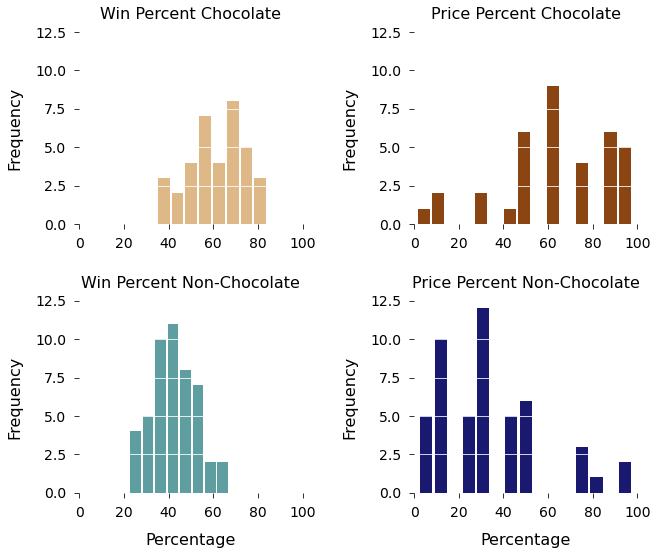

In [64]:
# Creating the grid of subplots 2x2:
fig, ax = plt.subplots(2, 2, figsize = (10, 8))
#spacing between the plots
plt.subplots_adjust(top = 0.9,
                    bottom = 0.1,
                    wspace = 0.5, 
                    hspace = 0.4)

#NOTE: this is the index order of the plots
# win percent chocolate
# price percent chocolate
# win percent non-chocolate 
# price percent non-chocolate 
ax_wpc, ax_ppc, ax_wpnc, ax_ppnc = ax.flatten() #return a 1-D array

# Constants and params:
LABEL_SIZE = 16
TICK_SIZE = 14
PAD = 13
wp_bins = 8 #win percent bin size
pp_bins = 15 #price percent bin size

##################################################################
##################################################################
# Creating histograms for each subplot:
axdf_dict = {ax_wpc: wpc_df, ax_ppc: ppc_df, #chocolate
             ax_wpnc: wpnc_df, ax_ppnc: ppnc_df} #non-chocolate
ax_list = list(axdf_dict.keys()) #in order to index the axes subplots

for ax_keys, df_values in axdf_dict.items():
    if (ax_keys == ax_list[0]) or (ax_keys == ax_list[2]): #win percent
        if ax_keys == ax_list[0]: #win percent chocolate
            color = 'burlywood'
            title = 'Win Percent Chocolate'
        
        if ax_keys == ax_list[2]: #win percent non-chocolate
            color = 'cadetblue'
            title = 'Win Percent Non-Chocolate'
            ax_keys.set_xlabel('Percentage', fontsize = LABEL_SIZE, labelpad = PAD)
        
        bins = wp_bins
        ax_keys.hist(df_values, rwidth = 0.85, bins = bins, color = color) #histogram
        [ax_keys.spines[j].set_visible(False) for j in ax_keys.spines] #removing splines
        ax_keys.tick_params(labelsize = TICK_SIZE, pad = 8, length = 5) #size of axis marks and ticks
        ax_keys.grid(axis = 'y',color= 'white') #gridline
        ax_keys.set_xlim(0, 100)
        ax_keys.set_ylim(0, 12.5)
        ax_keys.set_ylabel('Frequency', fontsize = LABEL_SIZE, labelpad = PAD)
        ax_keys.set_title(title, fontsize = LABEL_SIZE, pad = PAD)
        
    else: #price percent
        if ax_keys == ax_list[1]: #price percent chocolate
            color = 'saddlebrown'
            title = 'Price Percent Chocolate'
        
        if ax_keys == ax_list[3]: #price percent non-chocolate
            color = 'midnightblue'
            title = 'Price Percent Non-Chocolate'
            ax_keys.set_xlabel('Percentage', fontsize = LABEL_SIZE, labelpad = PAD)
        
        bins = pp_bins
        ax_keys.hist(df_values, rwidth = 0.85, bins = bins, color = color)
        [ax_keys.spines[j].set_visible(False) for j in ax_keys.spines]
        ax_keys.tick_params(labelsize = TICK_SIZE, pad = 8, length = 5)
        ax_keys.set_xlim(0, 100)
        ax_keys.set_ylim(0, 12.5)
        ax_keys.grid(axis = 'y',color= 'white')
        ax_keys.set_ylabel('Frequency', fontsize = LABEL_SIZE, labelpad = PAD)
        ax_keys.set_title(title, fontsize = LABEL_SIZE, pad = PAD)
        
plt.savefig('subplots.png', bbox_inches = 'tight', facecolor = 'white')
plt.show()

***
# Part 3

## Question: How many of each type of candy were in the original survey?

### Task

Using the sample sizes for each type of candy found in the bar chart, display this information graphically with a waffle plot.

In [65]:
# Making a list of the candy type value counts:
candy_group = list(choc_df1['is_chocolate'].value_counts())
candy_group

[37, 36, 11, 1]

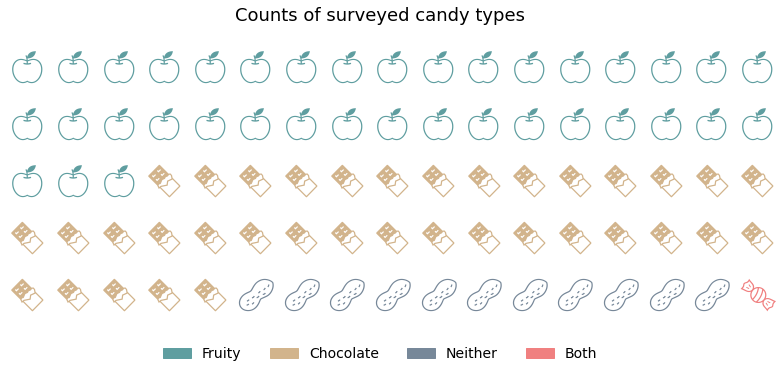

In [83]:
# Making the waffle plot:
colors = ['cadetblue', 'tan', 'lightslategrey', 'lightcoral']
fig = plt.figure(figsize = [11,7],
                 FigureClass = Waffle,
                 rows = 5,
                 values = candy_group, #listed value counts
                 colors = colors,
                 font_size = 32,
                 vertical = True,
                 starting_location = 'NW',
                 interval_ratio_x = 1.8, #width spacing
                 interval_ratio_y = 2.5, #height spacing
                 font_file = '/Users/amard/Library/Fonts/NotoEmoji-Regular.ttf',
                 characters = ['🍏', '🍫', '🥜', '🍬'],
                 title = {'label': 'Counts of surveyed candy types',
                          'loc': 'center',
                          'fontdict': {'fontsize': 18},
                          'pad': 40
                         },
                 legend = {'labels': ['Fruity', 'Chocolate', 'Neither', 'Both'],
                           'frameon': False,
                           'fontsize': 14,
                           'frameon': False,
                           'ncol': 4,
                           'loc': 'center',
                           'bbox_to_anchor': [0.5, -0.2]
                          }
                )
plt.savefig('waffle.png', bbox_inches = 'tight', facecolor = 'white')
plt.show()